## API Test Notebook

#### In this project, I pull an API from the coinmarket website and play around with the data a little bit

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '15a67ce1-cca4-4bf7-9b73-5261140a4daf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-21T15:47:08.512Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 8833}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10564, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# This normalizes the data and makes it look good in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10564,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954878e+07,1.954878e+07,False,NaN,1,NaN,NaN,None,2023-11-21T15:46:00.000Z,36540.610345,2.129276e+10,18.0478,-0.437033,-2.109840,0.879061,22.440239,37.013281,39.786130,7.143244e+11,51.6598,7.673528e+11,None,2023-11-21T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
1,1027,Ethereum,ETH,ethereum,7822,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202510e+08,1.202510e+08,True,NaN,2,NaN,NaN,None,2023-11-21T15:46:00.000Z,1965.846553,1.179974e+10,5.8775,-1.245222,-3.508023,-3.746268,20.888564,23.164645,18.676295,2.363950e+11,17.0855,2.363950e+11,None,2023-11-21T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
2,825,Tether USDt,USDT,tether,66127,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.802709e+10,9.062328e+10,True,NaN,3,NaN,NaN,None,2023-11-21T15:45:00.000Z,1.000345,4.083306e+10,13.2689,0.006543,-0.040720,-0.002967,-0.002891,0.029206,0.028367,8.805743e+10,6.3683,9.065451e+10,None,2023-11-21T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-21 15:48:33.069662
3,1839,BNB,BNB,bnb,1777,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517003e+08,1.517003e+08,False,NaN,4,NaN,NaN,None,2023-11-21T15:45:00.000Z,251.930085,1.752809e+09,157.0433,-1.567823,1.655302,2.923602,17.633190,19.357440,17.067991,3.821786e+10,2.7639,3.821786e+10,None,2023-11-21T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
4,52,XRP,XRP,xrp,1147,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-21T15:46:00.000Z,0.599071,1.352249e+09,29.5158,-1.048512,-3.287498,-8.710999,15.671565,17.054478,14.868697,3.218106e+10,2.3273,5.990707e+10,None,2023-11-21T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
5,3408,USDC,USDC,usd-coin,15048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.449603e+10,2.449603e+10,False,NaN,6,NaN,NaN,None,2023-11-21T15:46:00.000Z,1.000034,5.805109e+09,24.6403,0.013752,0.004349,-0.003616,0.016189,-0.003912,-0.000969,2.449686e+10,1.7705,2.449686e+10,None,2023-11-21T15:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-21 15:48:33.069662
6,5426,Solana,SOL,solana,550,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.229899e+08,5.629832e+08,True,NaN,7,NaN,NaN,None,2023-11-21T15:46:00.000Z,54.137138,2.034077e+09,15.0695,-1.249762,-8.190095,-4.326120,90.516144,176.874130,160.030514,2.289946e+10,1.6551,3.047830e+10,None,2023-11-21T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
7,2010,Cardano,ADA,cardano,978,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.528848e+10,3.636539e+10,False,NaN,8,NaN,NaN,None,2023-11-21T15:45:00.000Z,0.368420,3.622261e+08,-3.6737,-1.523231,-6.083409,1.394399,43.394956,50.143344,40.490394,1.300097e+10,0.9402,1.657889e+10,None,2023-11-21T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:48:33.069662
8,74,Dogecoin,DOGE,dogecoin,828,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [4]:
#Creating a function to run the API request

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '15a67ce1-cca4-4bf7-9b73-5261140a4daf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r"E:\API files\API.csv"):
       df.to_csv(r"E:\API files\API.csv", header='column_names')
    else:
       df.to_csv(r"E:\API files\API.csv", mode = 'a', header=False)

In [5]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(15) #sleep for 15 seconds
exit()  

API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [6]:
df2 = pd.read_csv(r"E:\API files\API.csv")
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10563,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.954871e+07,1.954871e+07,False,NaN,1,NaN,NaN,NaN,2023-11-21T13:37:00.000Z,37120.701794,1.967954e+10,23.1357,-0.152104,-0.213053,1.303155,23.877994,39.574593,43.625678,7.256619e+11,51.4858,7.795347e+11,NaN,2023-11-21T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
1,1,1027,Ethereum,ETH,ethereum,7820,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202510e+08,1.202510e+08,True,NaN,2,NaN,NaN,NaN,2023-11-21T13:37:00.000Z,2011.050058,1.141216e+10,16.5052,0.027800,-0.675965,-1.970229,23.009629,26.017834,22.785154,2.418308e+11,17.1648,2.418308e+11,NaN,2023-11-21T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
2,2,825,Tether USDt,USDT,tether,66114,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.802709e+10,9.062328e+10,True,NaN,3,NaN,NaN,NaN,2023-11-21T13:36:00.000Z,1.000258,3.867801e+10,17.8347,-0.002647,-0.037984,0.000501,-0.018698,0.029248,0.090012,8.804976e+10,6.2471,9.064662e+10,NaN,2023-11-21T13:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-21 13:38:36.806500
3,3,1839,BNB,BNB,bnb,1777,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517003e+08,1.517003e+08,False,NaN,4,NaN,NaN,NaN,2023-11-21T13:36:00.000Z,258.344355,1.655238e+09,154.6274,-0.087276,4.452659,4.936789,20.234975,22.682265,21.130231,3.919091e+10,2.7806,3.919091e+10,NaN,2023-11-21T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
4,4,52,XRP,XRP,xrp,1147,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,NaN,2023-11-21T13:37:00.000Z,0.614186,1.259013e+09,21.6483,0.169727,-1.524056,-6.992243,18.512189,20.232761,18.582047,3.299304e+10,2.3409,6.141861e+10,NaN,2023-11-21T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
5,5,3408,USDC,USDC,usd-coin,15047,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.451449e+10,2.451449e+10,False,NaN,6,NaN,NaN,NaN,2023-11-21T13:37:00.000Z,0.999878,5.500506e+09,33.4489,-0.017439,-0.016206,-0.027756,-0.005985,-0.026873,-0.005489,2.451149e+10,1.7398,2.451149e+10,NaN,2023-11-21T13:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-21 13:38:36.806500
6,6,5426,Solana,SOL,solana,548,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.229901e+08,5.629834e+08,True,NaN,7,NaN,NaN,NaN,2023-11-21T13:37:00.000Z,55.994589,1.927772e+09,18.8005,-0.821804,-7.314563,2.907891,94.670429,185.709058,172.985842,2.368516e+10,1.6811,3.152402e+10,NaN,2023-11-21T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
7,7,2010,Cardano,ADA,cardano,978,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.528848e+10,3.636539e+10,False,NaN,8,NaN,NaN,NaN,2023-11-21T13:36:00.000Z,0.378301,3.407023e+08,-3.6046,-0.431493,-3.029628,3.630991,46.729796,54.634647,45.859825,1.334967e+10,0.9472,1.702355e+10,NaN,2023-11-21T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 13:38:36.806500
8,8,74,Dogecoin,DOGE,dogecoin,826,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of

In [7]:
# Changing values from scientific notation to float format

pd.set_option('display.float_format', lambda x: '%5f' %x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10564,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19548781.000000,19548781.000000,False,NaN,1,NaN,NaN,None,2023-11-21T15:48:00.000Z,36855.820183,21392812426.292206,18.528000,0.563864,-1.432490,1.877954,23.531197,38.242956,41.003384,720486357323.607788,52.105400,773972223833.069946,None,2023-11-21T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:49:57.406524
1,1027,Ethereum,ETH,ethereum,7822,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120251000.411085,120251000.411085,True,NaN,2,NaN,NaN,None,2023-11-21T15:48:00.000Z,1982.353854,11846388383.876841,6.285900,-0.400982,-2.819089,-2.887873,21.942686,24.238207,19.678765,238380034117.745789,17.229000,238380034117.750000,None,2023-11-21T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:49:57.406524
2,825,Tether USDt,USDT,tether,66127,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,88027089860.877945,90623279058.109589,True,NaN,3,NaN,NaN,None,2023-11-21T15:47:00.000Z,0.999792,40880401116.850357,13.358300,-0.026550,-0.068768,-0.052954,-0.067846,-0.016764,0.015414,88008793566.517059,6.364800,90604443149.839996,None,2023-11-21T15:47:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-21 15:49:57.406524
3,1839,BNB,BNB,bnb,1777,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700252.875899,151700252.875899,False,NaN,4,NaN,NaN,None,2023-11-21T15:47:00.000Z,252.273550,1755898010.373399,157.396500,-1.358366,1.836196,2.981984,17.758826,19.545464,17.197944,38269961376.258591,2.767700,38269961376.260002,None,2023-11-21T15:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:49:57.406524
4,52,XRP,XRP,xrp,1147,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53718306475.000000,99988221902.000000,False,NaN,5,NaN,NaN,None,2023-11-21T15:48:00.000Z,0.599670,1357665484.341797,29.947900,-0.972146,-3.212289,-8.607711,15.776155,17.170618,14.961895,32213231481.723904,2.329700,59966952786.790001,None,2023-11-21T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:49:57.406524
5,3408,USDC,USDC,usd-coin,15048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24496031331.078846,24496031331.078846,False,NaN,6,NaN,NaN,None,2023-11-21T15:48:00.000Z,0.999949,5809884546.563462,24.931700,0.006938,-0.008143,-0.010095,0.001669,-0.020451,-0.017292,24494789357.408337,1.770400,24494789357.410000,None,2023-11-21T15:48:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-21 15:49:57.406524
6,5426,Solana,SOL,solana,550,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422989927.993217,562983199.764850,True,NaN,7,NaN,NaN,None,2023-11-21T15:47:00.000Z,54.097413,2034293561.010646,15.038200,-1.392910,-8.276461,-4.433584,90.343879,176.680083,159.764764,22882660823.016266,1.653800,30455934661.130001,None,2023-11-21T15:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-21 15:49:57.406524
7,2010,Cardano,ADA,cardano,978,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35288475269.569000,36365391092.903999,False,NaN,8,NaN,NaN,None,2023-11-21T15:47:00.000Z,0.368631,362673348.480102,-3.460000,-1.397671,-5.95

In [10]:
## Grouping the data with averages

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,0.563864,-1.432490,1.877954,23.531197
Ethereum,-0.400982,-2.819089,-2.887873,21.942686
Tether USDt,-0.026550,-0.068768,-0.052954,-0.067846
BNB,-1.358366,1.836196,2.981984,17.758826
XRP,-0.972146,-3.212289,-8.607711,15.776155
USDC,0.006938,-0.008143,-0.010095,0.001669
Solana,-1.392910,-8.276461,-4.433584,90.343879
Cardano,-1.397671,-5.950087,1.154925,43.492919
Dogecoin,-1.487467,-6.924333,1.126149,23.315874


In [11]:
## For visualization purposes, we need the percent_change averages to be rows and not columns like they are above.
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     0.563864
             quote.USD.percent_change_24h   -1.432490
             quote.USD.percent_change_7d     1.877954
             quote.USD.percent_change_30d   23.531197
Ethereum     quote.USD.percent_change_1h    -0.400982
             quote.USD.percent_change_24h   -2.819089
             quote.USD.percent_change_7d    -2.887873
             quote.USD.percent_change_30d   21.942686
Tether USDt  quote.USD.percent_change_1h    -0.026550
             quote.USD.percent_change_24h   -0.068768
             quote.USD.percent_change_7d    -0.052954
             quote.USD.percent_change_30d   -0.067846
BNB          quote.USD.percent_change_1h    -1.358366
             quote.USD.percent_change_24h    1.836196
             quote.USD.percent_change_7d     2.981984
             quote.USD.percent_change_30d   17.758826
XRP          quote.USD.percent_change_1h    -0.972146
             quote.USD.percent_change_24

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
# Changing the data from a series to a data frame

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   0.563864
            quote.USD.percent_change_24h -1.432490
            quote.USD.percent_change_7d   1.877954
            quote.USD.percent_change_30d 23.531197
Ethereum    quote.USD.percent_change_1h  -0.400982
            quote.USD.percent_change_24h -2.819089
            quote.USD.percent_change_7d  -2.887873
            quote.USD.percent_change_30d 21.942686
Tether USDt quote.USD.percent_change_1h  -0.026550
            quote.USD.percent_change_24h -0.068768
            quote.USD.percent_change_7d  -0.052954
            quote.USD.percent_change_30d -0.067846
BNB         quote.USD.percent_change_1h  -1.358366
            quote.USD.percent_change_24h  1.836196
            quote.USD.percent_change_7d   2.981984
            quote.USD.percent_change_30d 17.758826
XRP         quote.USD.percent_change_1h  -0.972146
            quote.USD.percent_change_24h -3.212289
            quote.USD.percent_change_7d  -8.607711
            quote.USD.percent_change_30d 15.776155
USDC        quote.USD.percent_change_1h   0.006938
            quote.USD.percent_change_24h -0.008143
            quote.USD.percent_change_7d  -0.010095
            quote.USD.percent_change_30d  0.001669
Solana      quote.USD.percent_change_1h  -1.392910
            quote.USD.percent_change_24h -8.276461
            quote.USD.percent_change_7d  -4.433584
            quote.USD.percent_change_30d 90.343879
Cardano     quote.USD.percent_change_1h  -1.397671
            quote.USD.percent_change_24h -5.950087
            quote.USD.percent_change_7d   1.154925
            quote.USD.percent_change_30d 43.492919
Dogecoin    quote.USD.percent_change_1h  -1.487467
            quote.USD.percent_change_24h -6.924333
            quote.USD.percent_change_7d   1.126149
            quote.USD.percent_change_30d 23.315874
TRON        quote.USD.percent_change_1h  -1.086341
            quote.USD.percent_change_24h -3.718545
            quote.USD.percent_change_7d  -5.534131
            quote.USD.percent_change_30d 11.062640

In [14]:
type(df5)

pandas.core.frame.DataFrame

In [15]:
# Counting the values in the dataframe
df5.count()

values    40
dtype: int64

In [16]:
# Creating an index for the dataframe instead of using the 'name' column

index = pd.Index(range(40))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.563864
1,Bitcoin,quote.USD.percent_change_24h,-1.432490
2,Bitcoin,quote.USD.percent_change_7d,1.877954
3,Bitcoin,quote.USD.percent_change_30d,23.531197
4,Ethereum,quote.USD.percent_change_1h,-0.400982
5,Ethereum,quote.USD.percent_change_24h,-2.819089
6,Ethereum,quote.USD.percent_change_7d,-2.887873
7,Ethereum,quote.USD.percent_change_30d,21.942686
8,Tether USDt,quote.USD.percent_change_1h,-0.026550
9,Tether USDt,quote.USD.percent_change_24h,-0.068768


In [18]:
# Renaming the 'level_1' column
df7= df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.563864
1,Bitcoin,quote.USD.percent_change_24h,-1.432490
2,Bitcoin,quote.USD.percent_change_7d,1.877954
3,Bitcoin,quote.USD.percent_change_30d,23.531197
4,Ethereum,quote.USD.percent_change_1h,-0.400982
5,Ethereum,quote.USD.percent_change_24h,-2.819089
6,Ethereum,quote.USD.percent_change_7d,-2.887873
7,Ethereum,quote.USD.percent_change_30d,21.942686
8,Tether USDt,quote.USD.percent_change_1h,-0.026550
9,Tether USDt,quote.USD.percent_change_24h,-0.068768


In [19]:
#Changing the row names for easy visualization

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d'],['1h','24h','7d','30d'])
df7 

,name,percent_change,values
0,Bitcoin,1h,0.563864
1,Bitcoin,24h,-1.432490
2,Bitcoin,7d,1.877954
3,Bitcoin,30d,23.531197
4,Ethereum,1h,-0.400982
5,Ethereum,24h,-2.819089
6,Ethereum,7d,-2.887873
7,Ethereum,30d,21.942686
8,Tether USDt,1h,-0.026550
9,Tether USDt,24h,-0.068768


In [20]:
# Importing libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt

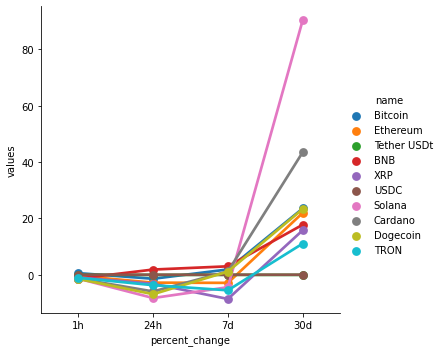

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
## Selecting only the Bitcoin data

df8 = df2[['name', 'quote.USD.price','timestamp']]
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,37120.701794,2023-11-21 13:38:36.806500
10,Bitcoin,37120.701794,2023-11-21 13:38:52.524916
20,Bitcoin,37120.701794,2023-11-21 13:39:08.249908
30,Bitcoin,37120.701794,2023-11-21 13:39:23.986488
40,Bitcoin,37109.988838,2023-11-21 13:39:39.922955
50,Bitcoin,36855.820183,2023-11-21 15:49:41.538657
60,Bitcoin,36855.820183,2023-11-21 15:49:57.406524


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

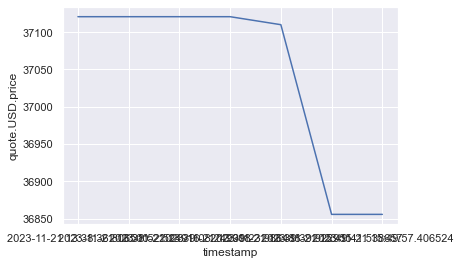

In [23]:
# Visualizing the market trend for Bitcoin

sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data =df9)